# Descriptives
___

<b> import modules </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np
import csv

<b> left align all markdown tables </b>

In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

<b> read csv file to a pandas dataframe </b>

In [4]:
df = pd.read_csv("tristate_final_data.csv")
df.head()

,NAME,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,SNAP % Population,SNAP Per Capita Benefit or TAM,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,county code
0,"Albany County, New York",87943,3989,304204,289.092188,13.112911,"15,087","34,247",11%,"$51,473,977.00",...,"7,647","289,287",38.5,36.8,40.0,"126,251",2,"60,631",36,1
1,"Allegany County, New York",2601,126,48946,53.140195,2.574266,"2,994","7,305",15%,"$10,979,956.00",...,557,"48,276",37.8,36.2,39.2,"18,208",2,"10,576",36,3
2,"Bronx County, New York",2544478,234021,1385108,1837.024983,168.955056,"184,934","512,267",37%,"$769,937,572.00",...,"73,243","643,695",32.8,30.6,34.9,"483,449",3,"368,196",36,5
3,"Broome County, New York",24218,1802,200600,120.727817,8.983051,"13,226","30,684",15%,"$46,118,533.00",...,"5,087","193,822",40.2,38.1,42.2,"82,167",2,"40,559",36,7
4,"Cattaraugus County, New York",3875,128,80317,48.246324,1.593685,"5,801","13,980",17%,"$21,012,556.00",...,"1,363","78,972",40.7,39.8,41.6,"32,263",2,"18,801",36,9


<b> Number of rows, number of columns in dataset </b>

In [5]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 91
There are # number of columns in the dataset : 43


| **# Rows** | **# Features** |
|----------|--------------|
| 12330    | 18           |


<b> Features datatypes and non-null </b>

In [6]:
 df.info()
# convert table to markdown, source: https://tableconvert.com/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 43 columns):
NAME                                          91 non-null object
Covid Confirmed Cases                         91 non-null int64
Covid Deaths                                  91 non-null int64
Population                                    91 non-null int64
Covid Case Rate (per 1000)                    91 non-null float64
Covid Death Rate (per 1000)                   91 non-null float64
 Households SNAP                              91 non-null object
 Estimated Individuals SNAP                   91 non-null object
 SNAP % Population                            91 non-null object
 SNAP Per Capita Benefit or TAM               91 non-null object
 Total Citizen Educated in US                 91 non-null object
 Citizen Less than High School  Education     91 non-null object
 Citizen High School  Graduate                91 non-null object
 Citizen Some College  Education              91 non-

<b> Features grouped by data type </b>

In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Covid Confirmed Cases', 'Covid Deaths ', 'Population',
        ' Average Household Size ', 'state code', 'county code'],
       dtype='object'),
 dtype('float64'): Index(['Covid Case Rate (per 1000)', 'Covid Death Rate (per 1000)',
        'Median Age', 'Male Median Age', 'Female Median Age'],
       dtype='object'),
 dtype('O'): Index(['NAME', ' Households SNAP ', ' Estimated Individuals SNAP ',
        ' SNAP % Population ', ' SNAP Per Capita Benefit or TAM ',
        ' Total Citizen Educated in US ',
        ' Citizen Less than High School  Education ',
        ' Citizen High School  Graduate ', ' Citizen Some College  Education ',
        ' Citizen College Degree  ',
        ' Citizen Graduate or Professional Degree ', ' Total Citizen Income ',
        ' Citizen No Income ', 'Citizen Income $1-$9,999',
        'Citizen Income $10,000-$14,999', 'Citizen Income $15,000-$24,999',
        'Citizen Income $25,000-$34,999', 'Citizen Income $35,000-$49,999',
     

<b> Show first 5 rows of the dataset </b>

In [8]:
df.head()

,NAME,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Households SNAP,Estimated Individuals SNAP,SNAP % Population,SNAP Per Capita Benefit or TAM,...,Other Race Alone,Hispanic or Latino,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,state code,county code
0,"Albany County, New York",87943,3989,304204,289.092188,13.112911,"15,087","34,247",11%,"$51,473,977.00",...,"7,647","289,287",38.5,36.8,40.0,"126,251",2,"60,631",36,1
1,"Allegany County, New York",2601,126,48946,53.140195,2.574266,"2,994","7,305",15%,"$10,979,956.00",...,557,"48,276",37.8,36.2,39.2,"18,208",2,"10,576",36,3
2,"Bronx County, New York",2544478,234021,1385108,1837.024983,168.955056,"184,934","512,267",37%,"$769,937,572.00",...,"73,243","643,695",32.8,30.6,34.9,"483,449",3,"368,196",36,5
3,"Broome County, New York",24218,1802,200600,120.727817,8.983051,"13,226","30,684",15%,"$46,118,533.00",...,"5,087","193,822",40.2,38.1,42.2,"82,167",2,"40,559",36,7
4,"Cattaraugus County, New York",3875,128,80317,48.246324,1.593685,"5,801","13,980",17%,"$21,012,556.00",...,"1,363","78,972",40.7,39.8,41.6,"32,263",2,"18,801",36,9


<b> Descriptive Statistics </b>

In [9]:
df.describe().round(2)

,Covid Confirmed Cases,Covid Deaths,Population,Covid Case Rate (per 1000),Covid Death Rate (per 1000),Median Age,Male Median Age,Female Median Age,Average Household Size,state code,county code
count,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00,91.00
mean,345605.69,24234.99,348836.19,494.78,30.01,40.16,38.84,41.45,2.44,33.16,47.79
std,706010.22,59348.61,468866.99,569.68,36.52,3.10,3.23,3.02,0.50,7.59,36.96
min,304.00,0.00,4836.00,16.82,0.00,29.80,28.50,31.10,2.00,9.00,1.00
25%,5696.00,222.50,64956.00,88.36,3.93,38.50,37.00,39.90,2.00,34.00,15.00
50%,36536.00,1815.00,149265.00,230.12,13.46,40.40,39.20,41.90,2.00,36.00,37.00
75%,297332.00,19315.00,467878.00,698.36,48.04,41.70,40.55,42.95,3.00,36.00,78.00
max,3587059.00,347696.00,2504700.00,2523.79,168.96,51.30,50.90,51.80,3.00,36.00,123.00


# Visualize Dataset
___

## 1. Barcharts

<b> Visualize target variable: 'COVID Confirmed Cases' </b>

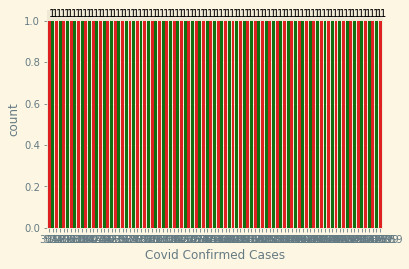

In [11]:
plt.style.use('Solarize_Light2')
graph = sns.countplot(df['Covid Confirmed Cases'], palette=['red', 'green'])

# show the values above each bar in the barchart with relative position xy
for p in graph.patches:
    graph.annotate(np.round(p.get_height(), 2), (p.get_x() + 0.3, p.get_height() * 1.02))

Take-away Barchart:
--------------------
 - The target variable is highly imbalanced (as seen before: 84.53% is zero)

___
Visualize the following features:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration

In [ ]:
df_pagesvisited = df[['Administrative', 'Informational', 'ProductRelated']]
df_pagesvisited_mean = df_pagesvisited.mean()

In [ ]:
objects = ('Administrative', 'Informational', 'Product Related')
x = np.arange(len(objects))
y = df_pagesvisited_mean.round(2)
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Count', fontsize=14)
# set the barchart title
plt.title('AVERAGE NUMBER OF WEBPAGES \n VISITED BY TYPE OF WEBPAGE', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v))
# show the barchart
plt.show()

Take-aways Barchart:
--------------------
 - The lowest average number of webpages visited by type of webpage for users are: <b> Informational </b> Webpages (~2 webpages on average).
 - Followed closely by <b> Administrative </b> Webpages (~0.5 webpages on average by user).
 - Users visit on average the highest number of webpages that are <b> Product Related </b> (~32 webpages).

In [ ]:
# create a new dataframe for just the duration types
df_duration = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# test how many values we have before filtering
df_duration.count()

# apply filter, excluding zeros
df_duration_nonzero = df[df_duration > 0][['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# count the number of instances that are non-zero
df_duration_nonzero.count()

# calculate the average time spent by type of webpage (in minutes)
df_duration_nonzero_mean_minutes = df_duration_nonzero.mean()/60
df_duration_nonzero_mean_minutes

In [ ]:
objects = ('Administrative', 'Informational', 'Product Related')

x = np.arange(len(objects))
y = df_duration_nonzero_mean_minutes.round(2)
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Average time spent \n (in minutes)', fontsize=14)
# set the barchart title
plt.title('AVERAGE DURATION (in minutes) \n OF TIME SPENT BY TYPE OF WEBPAGES \n (for a visitor in each session)', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v))
# show the barchart
plt.show()

Take-aways Barchart:
--------------------
 - The lowest average duration spent by type of webpages is: <b> Administrative </b> (~2.6 minutes).
 - Followed closely by <b> Informational </b> (~3.0 minutes).
 - Users spent on average by far the highest amount of time at <b> Product Related </b> webpages (~21.2 minutes).

In [ ]:
# show 2 plots side by side
df1 = df_duration_nonzero_mean_minutes
df2 = df_pagesvisited_mean

# define 3 colors for 3 bars
my_colors = ['#6e0dd0', '#36F57F', '#36ACF5']

# Define size subplots
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))  # 1 row, 2 columns

# Graph 1 
graph1 = df1.plot(kind='bar', ax=ax1, title='Average time spent \n by webpage type \n (for a visitor in a single session)', rot=20, color=my_colors)
graph1.set_xlabel("Webpage Type", fontsize=16)
graph1.set_ylabel("Duration (in minutes)", fontsize=14)
graph1.set_xticklabels(['Administrative', 'Informational', 'Product Related'], fontsize=14)
graph1.set_yticks(range(0, 36), 5)
# show the values above each bar in the barchart with relative position xy
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(), 2), (p.get_x() +0.12, p.get_height() * 1.02))

# Graph 2
graph2 = df2.plot(kind='bar', ax=ax2, title='Average # webpages visited \n by webpage type \n (for a visitor in a single session)', rot=20, color=my_colors)
graph2.set_xticklabels(['Administrative', 'Informational', 'Product Related'],  fontsize=14)
graph2.set_xlabel('Webpage Type', fontsize=16)
graph2.set_ylabel('Count', fontsize=14)
graph2.set_yticks(range(0, 36), 5)

# show the values above each bar in the barchart with relative position xy
for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(), 2), (p.get_x() + 0.12, p.get_height() * 1.02))

Take-aways:
--------------------
<b> Left-chart </b>
 - Users spent on average by far the highest amount of time at <b> Product Related </b> webpages (~21.2 minutes).

<b> Right-chart </b>
 - Users visit on average by far the most number of webpages that are <b> Product Related </b> (~32 webpages).

In [ ]:
# get the non_zero values by type of webpage and count total
df_pagesvisited_count = df_pagesvisited.count()
df_pagesvisited_nonzero = df_pagesvisited[df_pagesvisited > 0]
df_pagesvisited_nonzero_count = df_pagesvisited_nonzero.count()
df_pagesvisited_nonzero_count

In [ ]:
objects = ('Administrative', 'Informational', 'Product Related')

x = np.arange(len(objects))
y = df_pagesvisited_nonzero_count
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Count', fontsize=14)
# set the barchart title
plt.title('Count by \n Type of Webpages visited', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 200, str(v))
# show the barchart
plt.show()

___
Visualize the following features:
* BounceRates
* ExitRates
___

In [ ]:
df_bounce_exit_rates = df[['BounceRates', 'ExitRates']]

# count the observations in each feature of admin, info, productrelated
print('# obs for BounceRates and ExitRates incl. zeros')
print('------------------------------------------------------')
print(df_bounce_exit_rates.count())
print('------------------------------------------------------')

# calculate the average for BounceRates and ExitRates
print('Averages for BounceRates and ExitRates')
print('------------------------------------------------------')
df_bounce_exit_rates_mean = df_bounce_exit_rates.mean()
df_bounce_exit_rates_mean

In [ ]:
fig= plt.figure(figsize=(6,3))
objects = ('BounceRates', 'ExitRates')

x = np.arange(len(objects))
y = (df_bounce_exit_rates_mean*100).round(2) # convert to percentage x100%
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Percentage', fontsize=14)
# set the barchart title
plt.title('Average Bounce Rate and Average Exit Rate (%)', fontsize=14)
plt.yticks(range(0, 11))
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v)+'%')
# show the barchart
plt.show()

print('-------------------------------------------------------------')
print('* Bounce Rate:')
print('-------------------------------------------------------------')
print(' % of visitors who enter site from the page &', '\n',\
'leave that page ("bounce") without triggering any other requests', '\n', \
'to the analytics server during that session')
print('-------------------------------------------------------------')
print('* Exit Rates:')
print('-------------------------------------------------------------')
print('For all pageviews to the page, ', '\n', '% of visitors \
that were the last in the session')

In [ ]:
df.plot(kind='scatter', x='BounceRates', y='ExitRates')

## Take-away
* <b> ExitRates </b> and <b> BounceRates </b> appear to be highly positively correlated with a linear pattern.

## Special Day ##

___
Visualize the following feature:
* Special Day

In [ ]:
special_day_counts = pd.DataFrame(df['SpecialDay'].value_counts())
special_day_counts.sort_index()

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="SpecialDay", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Special Day closeness \n relative to visiting time website")
# set the x-label and fontsize
plt.xlabel('Special Day Closeness Category', fontsize=12)
# set the xticklabels
graph.set(xticklabels=['0.0%','20%','40%','60%','80%','100%'])
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

## Month ##

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Month", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of online sessions \n by Month")
# set the x-label and fontsize
plt.xlabel('Month', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="OperatingSystems", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Operating Systems")
# set the x-label and fontsize
plt.xlabel('OS Category', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Browser", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Browser")
# set the x-label and fontsize
plt.xlabel('Browser Category', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Region", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n Region")
# set the x-label and fontsize
plt.xlabel('Region', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="TrafficType", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n TrafficType")
# set the x-label and fontsize
plt.xlabel('TrafficType', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="VisitorType", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n VisitorType")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Weekend", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Webpages visited \n in Weekday vs Weekend")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [ ]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Revenue", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n non-purchases vs purchases online")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

## 2. Boxplots 

Administrative Webpages

In [ ]:
# show the number of administrative webpages visited and the time spent
ax = sns.boxplot(y="Administrative_Duration",x="Administrative", data=df)

Informational Webpages

In [ ]:
ax = sns.boxplot(y="Informational_Duration",x="Informational", data=df)

In [ ]:
#ax = sns.boxplot(y="ProductRelated_Duration",x="ProductRelated", data=df)
#conclusion: boxplot ProductRelated vs ProductRelated_Duration not informative - too many datapoints

## Takeaways
* The more (Administrative, Informational) webpages visited in a session the longer the duration
* There appear to be a lot of outliers

## Scatterplot ##

In [ ]:
#df.plot(kind='scatter', x=['BounceRates','ExitRates'], y ='SpecialDay')
ax1 = df.plot(kind='scatter', x='BounceRates', y='PageValues', color='red')    
ax2 = df.plot(kind='scatter', x='ExitRates', y='PageValues', color='green', ax=ax1)    
#ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)


In [ ]:
#df.plot(kind='scatter', x=['BounceRates','ExitRates'], y ='SpecialDay')
ax1 = df.plot(kind='scatter', x='Administrative', y='PageValues', color='red')    
ax2 = df.plot(kind='scatter', x='Informational', y='PageValues', color='green', ax=ax1, title='Scatterplot Admin vs Info # Pages Visited')   
#ax3 = df.plot(kind='scatter', x='ProductRelated', y='PageValues', color='b', ax=ax1)

## 3. Histograms 

In [ ]:
# function for histogram
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = column, "Fit results: mu = %.2f, std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [ ]:
plot_hist_norm(df, column='Administrative', bin_amount=10)

In [ ]:
plot_hist_norm(df, column='Administrative_Duration', bin_amount=10)

In [ ]:
plot_hist_norm(df, column='Informational', bin_amount=10)

In [ ]:
#df['PageValues'].describe()
plot_hist_norm(df, column='PageValues', bin_amount=25)

## Show Histograms as subplots ##

In [ ]:
# show mean, standard dev for each subplot
#mu, std = norm.fit(df[column])
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

# define all numeric features in new dataframe
df_nobinaryfeatures = df.drop(columns=['Revenue', 'Month', 'Weekend', 'VisitorType'])
pd.DataFrame.hist(df_nobinaryfeatures, figsize = [15,15])
plt.suptitle("Distribution of Numerical Features", fontsize=16)

## Compare Distributions Features to Target Variable
for visitors that made a transaction (=True) versus that did not make a transaction (=False)

In [ ]:
# visualize histograms for features with target variable
# source: https://medium.com/@davidmasse8/helpful-plotting-and-pandas-patterns-80fd82b2b88b

# drop features that are not numerical
df_1 = df.drop(columns=['Month', 'Weekend', 'VisitorType'])
# define the 1 and 0 for the target variable
yes = df_1[(df_1['Revenue'] == 1)]
no = df_1[(df_1['Revenue'] == 0)]
# define the list of features
cols = list(df_1.columns)
# remove the target variable from the list of features
cols.remove('Revenue')

# for each feature plot a histogram where the target variable is either 0 or 1
for name in cols:
    a = yes[name].values
    b = no[name].values
    sns.distplot(a, label = 'True', kde = False, rug = False)
    sns.distplot(b, label = 'False', kde = False, rug = False)
    plt.title(name)
    # show legend
    plt.legend()
    # show graph
    plt.show()

## Key Takeaway
* ExitRates and BounceRates are much smaller for visitors that made a transaction vs visitors that did not make a transaction
* ProductRelated_Duration is much smaller for visitors that made a transaction vs visitors that did not make a transaction

## Skewness ##
>* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.
* A symmetrical distribution has a skewness of zero.
* An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
* An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

In [ ]:
# check the skewness of the dataframe
df.skew()

## Take-away
* All features seem to be highly skewed and normalization is necessary in the data preparation phase.

## Correlation Analysis (on original features)
___

In [ ]:
# define correlation matrix (absolute corr values)
data_corr = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] 

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [ ]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print('----------------------------------------------------')
print('Top Absolute Correlations')
print('----------------------------------------------------')
# show top 'n' correlations
get_top_abs_correlations(data_corr, n=10)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=10)[get_top_abs_correlations(data_corr, n=10) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables

In [ ]:
# heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

## Take-away
> 4 Continuous features are highly correlated with another feature in the dataset.
    Either these features need to be combined or 1 of the correlated features should not be included in the modeling phase.
- BounceRates with ExitRates
- ProductRelated with ProductRelated_Duration
- Informational with Informational_Duration
- Administrative with Administratie_Duration

### Correlation Analysis between categorical features

In [ ]:
#pip install dython --user
from dython import nominal
# source: https://github.com/shakedzy/dython/issues/2

nominal.associations(df[['Weekend','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'SpecialDay']], nominal_columns='all')
#nominal.associations(df, nominal_columns=['Weekend','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType'])
#nominal.associations(df[['PageValues', 'VisitorType']])

## Take-away
> 2 Categorical features are highly correlated with another feature in the dataset.
- OperatingSystems with Browser (60%)
- VisitorType with Browser (51%)